In [1]:
import dataset
import numpy as np
import matplotlib.pyplot as plt

db = dataset.connect('sqlite:///../../data/barsave.db')

estimators = {}

for row in db.query('select name, score from estimators'):
    key = row.get('name')
    val = row.get('score')
    key_arr = key.split('_')
    if len(key_arr) == 3:
        ins = key_arr[0] + '_' + key_arr[1]
        typ = key_arr[2]
    else:
        ins = 'MISC'
        typ = key
    if ins in estimators.keys():
        estimators[ins][typ] = val
    else:
        estimators[ins] = { typ: val }
    
estimators

{'AU200_AUD': {'close': -0.9608694078079755,
  'high': -17.983577830468214,
  'low': -21.256641554246304,
  'open': 0.39467494646066364,
  'vol': -2.1762441785935747},
 'AUD_CAD': {'close': -0.992520165364087,
  'high': -0.0022331514837521365,
  'low': -0.002636598187955422,
  'open': 0.8563041050017111,
  'vol': -0.059434765538234124},
 'AUD_CHF': {'close': -0.9767983065779723,
  'high': -0.0018675866445753472,
  'low': -0.002351447621060152,
  'open': 0.7389431308505765,
  'vol': -0.1524522098717723},
 'AUD_HKD': {'close': -0.985620466787688,
  'high': -0.01639638935658359,
  'low': -0.01724036680151732,
  'open': 0.8461082916849242,
  'vol': 0.015282185954809383},
 'AUD_JPY': {'close': -0.9869605158781606,
  'high': -0.24792089756192418,
  'low': -0.31841074136158837,
  'open': 0.3289112948390584,
  'vol': -0.18969850414735426},
 'AUD_NZD': {'close': -0.9764913593873197,
  'high': -0.002388046812189452,
  'low': -0.0024676684749400527,
  'open': 0.9042379132641057,
  'vol': -0.12213

In [2]:
ope = []
clo = []
hig = []
low = []
#vol = []
for key in estimators.keys():
    if 'open' in estimators[key].keys():
        ope.append(estimators[key].get('open'))
    if 'high' in estimators[key].keys():
        hig.append(estimators[key].get('high'))
    if 'low' in estimators[key].keys():
        low.append(estimators[key].get('low'))
    if 'close' in estimators[key].keys():
        clo.append(estimators[key].get('close'))
    #vol.append(estimators[key].get('vol'))
len(ope)

124

Current size: [18, 12]


{'whiskers': [<matplotlib.lines.Line2D at 0xcd67310>,
 'caps': [<matplotlib.lines.Line2D at 0xcdcb2f0>,
 'boxes': [<matplotlib.lines.Line2D at 0xcd67590>,
 'medians': [<matplotlib.lines.Line2D at 0xcdcb7f0>,
 'fliers': [<matplotlib.lines.Line2D at 0xcdcb9f0>,
 'means': []}

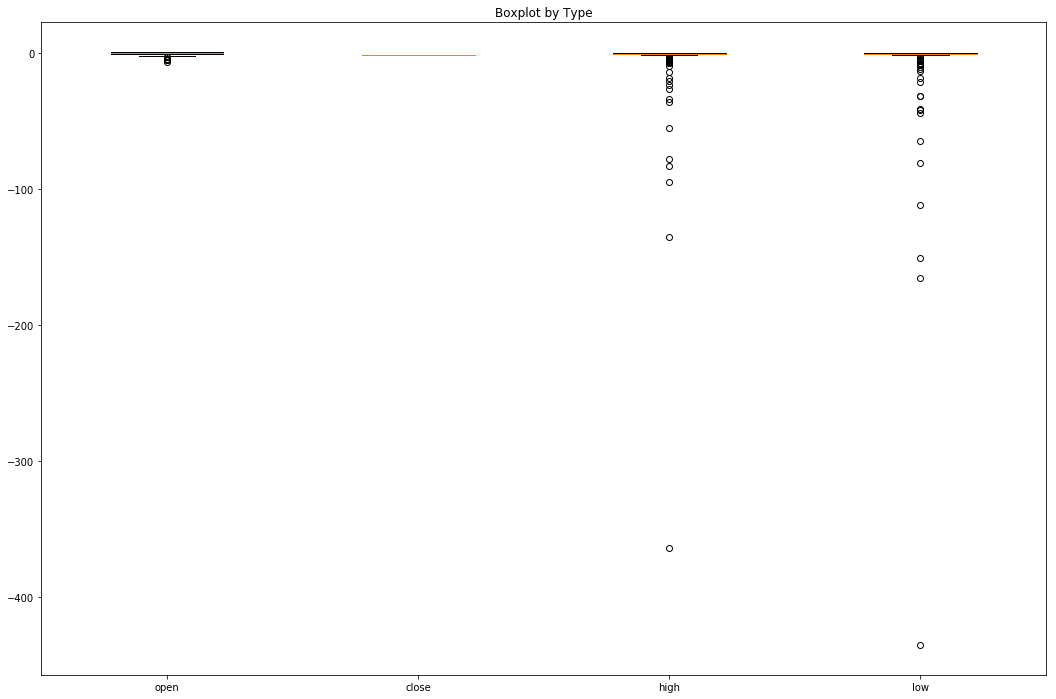

In [5]:
fig1, ax1 = plt.subplots()
fig_size = plt.rcParams["figure.figsize"]
print("Current size: " + str(fig_size))
fig_size[0] = 18
fig_size[1] = 12
ax1.set_title('Boxplot by Type')
ax1.boxplot([ope, clo, hig, low], labels = ['open', 'close', 'high', 'low'])
#ax1.boxplot([clo], labels = ['close'])
# Get current size
#plt.rcParams["figure.figsize"] = fig_size

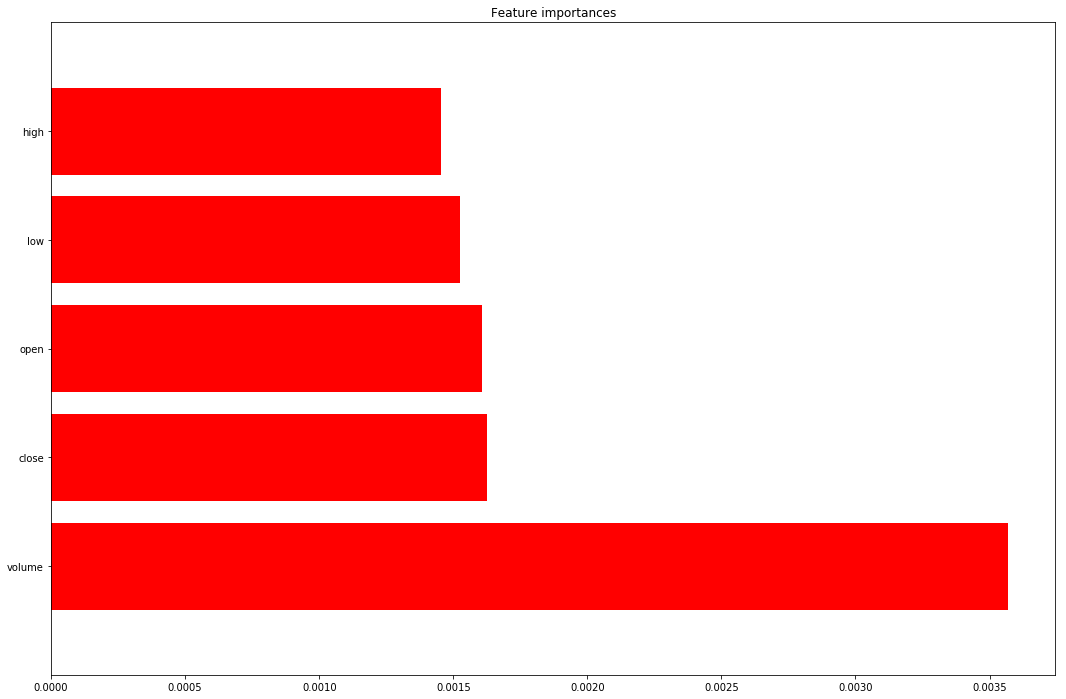

In [4]:
importances = []
X = []
feature_names = []
rows = []
features = {}
for row in db.query('select * from (select feature, sum(importance)/count(*) as importance from feature_importances group by feature) order by importance desc;'):
    _feats = row.get('feature').split('_')
    feature = _feats[-1]
    if feature in features.keys():
        features[feature]['importance'] += row.get('importance')
        features[feature]['count'] += 1
    else:
        features[feature] = {'importance': row.get('importance'), 'count': 1}

feature_arr = []
for feature in features.keys():
    feature_arr.append({'feature': feature, 'importance': features[feature]['importance']/features[feature]['count']})
feature_arr = sorted(feature_arr, key = lambda x: x.get('importance'),reverse = True)
for row in feature_arr:
    importances.append(row.get('importance'))
    feature_names.append(row.get('feature'))
    
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.barh(range(len(importances)), importances,
       color="r", align="center")
# If you want to define your own labels,
# change indices to a list of labels on the following line.
plt.yticks(range(len(importances)), [feature_names[i] for i in range(len(importances))])
plt.ylim([-1, len(importances)])
plt.show()